In [11]:
from qonstruct.code_builder.base import *
from qonstruct.code_builder.color_code import *

import networkx as nx

import docplex.mp
from docplex.mp.model import Model

In [12]:
import qonstruct.io

In [253]:
def remove_stray_nodes(gr: nx.Graph) -> nx.Graph:
    _gr = gr.copy()
    removed = set()
    for x in gr.nodes():
        if gr.degree(x) == 0:
            removed.add(x)
    for x in removed:
        _gr.remove_node(x)
    return _gr


def read_in_color_code(code: str, semi=False) -> nx.Graph:
    _gr = qonstruct.io.read_tanner_graph_file(code)
    color_tanner_graph(_gr)
    if semi:
        _gr = make_semihyperbolic(_gr, '7_1_3')
    gr = remove_stray_nodes(_gr)
    removed = set()
    for x in gr.nodes():
        if gr.nodes[x]['node_type'] == 'z':
            removed.add(x)
    for x in removed:
        gr.remove_node(x)
    return gr

def remove_color_from_graph(gr: nx.Graph, c: int) -> nx.Graph:
    _gr = gr.copy()
    removed = set()
    for x in gr.nodes():
        if 'color' in gr.nodes[x] and gr.nodes[x]['color'] == c:
            removed.add(x)
    for x in removed:
        _gr.remove_node(x)
    return _gr

def get_bfs_tree(gr: nx.Graph) -> nx.Graph:
    _gr = nx.bfs_tree(gr, 0)
    for x in gr.nodes():
        if 'color' in gr.nodes[x]:
            _gr.nodes[x]['color'] = gr.nodes[x]['color']
    return _gr.to_undirected()

def draw_graph(gr: nx.Graph):
    gr = remove_stray_nodes(gr)
    COLOR_ARRAY = ['red', 'green', 'blue']
    sizes = [ 100 if 'color' in gr.nodes[x] else 10 for x in gr.nodes() ]
    colors = [ COLOR_ARRAY[gr.nodes[x]['color']] if 'color' in gr.nodes[x] else 'k' for x in gr.nodes() ]
    nx.draw_kamada_kawai(gr, node_size=sizes, node_color=colors)

In [262]:
gr = read_in_color_code('codes/hycc/6_6/96_36_4_4.txt')

computed 3-coloring


False False False


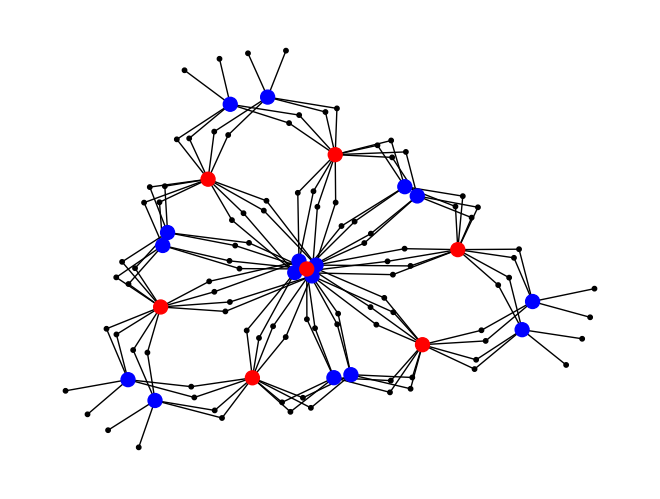

In [264]:
#_gr = get_bfs_tree(gr)
_gr = gr
gRG = remove_color_from_graph(_gr, 2)
gRB = remove_color_from_graph(_gr, 1)
gGB = remove_color_from_graph(_gr, 0)

draw_graph(gRB)
print(nx.is_planar(gRG), nx.is_planar(gRB), nx.is_planar(gGB))